# 지도 학습 (Supervised Learning)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length =np.array([8.4,13.7,15.0,16.2,17.4,18.0,18.7,19.0,19.6,20.0,
21.0,21.0,21.0,21.3,22.0,22.0,22.0,22.0,22.0,22.5,
22.5,22.7,23.0,23.5,24.0,24.0,24.6,25.0,25.6,26.5,
27.3,27.5,27.5,27.5,28.0,28.7,30.0,32.8,34.5,35.0,
36.5,36.0,37.0,37.0,39.0,39.0,39.0,40.0,40.0,40.0,
40.0,42.0,43.0,43.0,43.5,44.0])
perch_weight =np.array([5.9,32.0,40.0,51.5,70.0,100.0,78.0,80.0,85.0,85.0,
110.0,115.0,125.0,130.0,120.0,120.0,130.0,135.0,110.0,130.0,
150.0,145.0,150.0,170.0,225.0,145.0,188.0,180.0,197.0,218.0,
300.0,260.0,265.0,250.0,250.0,300.0,320.0,514.0,556.0,840.0,
685.0,700.0,700.0,690.0,900.0,650.0,820.0,850.0,900.0,1015.0,
820.0,1100.0,1000.0,1100.0,1000.0,1000.0])

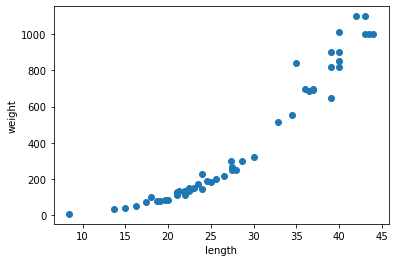

In [4]:
#	산점도 확인
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트와 테스트 세트 준비
    - train_test_split() 함수 사용
        • 1개의 데이터 세트(perch_length)만 사용
        • scikit-learn의 훈련 세트는 2차원 배열을 사용
            – 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
            – reshape(row,	col) 함수 사용
            – (42,) -> (42, 1)형태로 변경

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
# 길이 input, 무게 target
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                     perch_weight,
                                                                     random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [15]:
train_input = train_input.reshape(-1,1) # 1 컬럼 지정 해놓고 -1 나머지 알아서
test_input = test_input.reshape(-1,1)

In [16]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# k-최근접 이웃 회귀 알고리즘 정확도

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
knr =	KNeighborsRegressor()
#	모델 훈련
knr.fit(train_input,	train_target)
#	score():	훈련 모델 점수 확인,	결정 계수(R2)를 리턴
print(knr.score(test_input,	test_target))

0.992809406101064


# mean_absolute_error
    - mean_absolute_error (MAE): 평균 절대 오차
        • 타킷(실제 값)과 예측 값의 절대값 오차 평균
        • 절대값을 사용: 에러의 크기를 반영
        • sklearn.merics 패키지 포함

In [27]:
from sklearn.metrics import mean_absolute_error

#	테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

#	테스트 세트에 대한 평균 절대 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [68]:
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

# 과대적합 vs 과소적합

## 모델 개선: 이웃 개수 줄이기
    - 과소 적합 해결 방안: 이웃의 개수 줄임
        • 기본 값 5에서 n_neighbors =	3으로 변경
            – 모델이 더 복잡해짐
            – 훈련 세트의 국지적 패턴에 더 민감해짐

In [34]:
knr.n_neighbors =3
#	모델을 다시 훈련
knr.fit(train_input,train_target)
print("훈련 데이터로 모델의 정확도 점수 계산: ", knr.score(train_input,train_target))
knr.score(train_input,	train_target)
print("테스트 데이터로 모델의 정확도 점수 계산: ", knr.score(test_input,test_target))
knr.score(test_input,	test_target)

훈련 데이터로 모델의 정확도 점수 계산:  0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산:  0.9746459963987609


0.9746459963987609

# 이웃의 수에 따른 그래프 비교
    - k-최근접 회귀 알고리즘에서 이웃의 수 변경: 1, 5, 10
        • 농어의 길이를 5~45까지 변경하면서 무게 예측

In [35]:
#	k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

In [36]:
# x:농어의 길이(5 ~ 45까지 범위 설정)
x = np.arange(5,45).reshape(-1,1)

In [70]:
prediction

array([ 81.5,  81.5,  81.5,  81.5,  81.5,  81.5,  81.5,  81.5,  81.5,
        81.5,  81.5,  81.5,  81.5,  91.3, 100.8, 104.8, 116. , 128.5,
       148. , 161.2, 195.5, 211. , 211. , 247.4, 247.4, 347.5, 453.5,
       551. , 551. , 645.5, 700.5, 700.5, 739.1, 785. , 811. , 882.5,
       912.5, 912.5, 912.5, 912.5])

#	n=1,	5,	10일때 예측 결과 그래프
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    #	지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    
    #	훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label = 'train set')
    plt.plot(x, prediction, label = 'prediction', color = 'orange')
    
    plt.title('n_neighbors =	{}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# k-최근접 이웃 알고리즘의 문제점
    - k-최근접 이웃 회귀 알고리즘의 문제점
        • 가장 가까운 샘플을 찾아 평균값 계산
        • 새로운 샘플이 훈련 세트의 범위를 벗어나면 잘못된 예측을 함
    - 훈련 세트 밖의 샘플 예측
        • 50cm,	100cm	길이의 농어 무게 예측: 동일한 예측값

In [43]:
knr = KNeighborsRegressor(n_neighbors=3)

In [44]:
knr.fit(train_input,	train_target)

KNeighborsRegressor(n_neighbors=3)

In [45]:
print('50cm:',	knr.predict([[50]]))
print('100cm:',	knr.predict([[100]]))

50cm: [1033.33333333]
100cm: [1033.33333333]


## 50cm,	100cm	길이의 농어의 이웃 및 산점도 비교

In [48]:
dintance_50, indexes_50 = knr.kneighbors([[50]])

In [49]:
dintance_100, indexes_100 = knr.kneighbors([[100]])

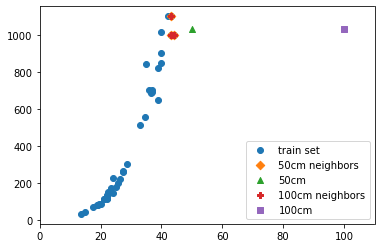

In [58]:
plt.scatter(train_input, train_target, label = 'train set')
plt.scatter(train_input[indexes_50], train_target[indexes_50], marker = 'D', label = '50cm neighbors')
plt.scatter(50, 1033, marker = '^', label = '50cm')
plt.scatter(train_input[indexes_100], train_target[indexes_100], marker = 'P', label = '100cm neighbors')
plt.scatter(100, 1033, marker = 's', label = '100cm')

plt.xlim(0, 110)
plt.legend()
plt.show()

In [66]:
# 훈련데이터에서 이웃 데이터의 인덱스 확인
print(indexes_50)
print(indexes_100)

[[34  8 14]]
[[34  8 14]]


In [67]:
# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

1033.3333333333333
1033.3333333333333


# 선형 회귀(Linear Regression)
    • 데이터를 가장 잘 표현할 수 있는 직선 방정식을 찾는 알고리즘
    • 특성과 타킷 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음
        – 특성과 타킷 사이의 관계: 선형 방정식의 계수(기울기) 와 절편에 저장
    • LinearRegression 클래스 사용
        – sklearn.linear_model 패키지
        – fit(), score(), predict() 메소드

# 훈련 데이터를 이용한 직선 방정식 구하기

In [72]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()
#	선형 회귀 모델 훈련
lr.fit(train_input, train_target)
#	50cm	농어에 대한 예측
print("50cm: ", lr.predict([[50]]))

#	기울기(a):	coef_,	절편(bias):	intercept_
print(lr.coef_, lr.intercept_)

50cm:  [1241.83860323]
[39.01714496] -709.0186449535477


# 산점도 및 직선 그래프 그리기
    - 기울기와 절편을 이용한 1차 방정식 그래프

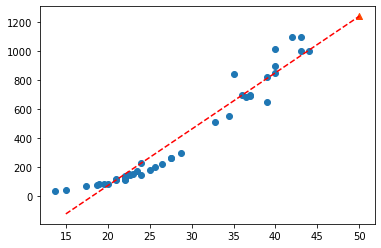

In [78]:
plt.scatter(train_input, train_target)

#	15에서 50까지 1차 방정식 그래프 그리기
#	plot([x축 데이터:시작, 끝],	[y축 데이터:시작, 끝])
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_],
        color = 'red', linestyle = '--')

#	50cm	농어 데이터
plt.scatter(50, 1241.8, marker = '^', color = 'orangered')
plt.show()

In [80]:
print([15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

[array([-123.7614705]), array([1241.83860323])]


In [81]:
[15,50]

[15, 50]

In [83]:
print('train	data	score:	',					
lr.score(train_input,	train_target))
print('test	data	score:	',	
lr.score(test_input,	test_target))

train	data	score:	 0.939846333997604
test	data	score:	 0.8247503123313558


# 다항 회귀(Polynomial Regression)
    - 농어의 길이와 무게에 대한 산점도
        • 일직선(1차 방정식)으로 표현하기 어려움
        • 무게가 0 이하일 가능성 발생
            – 모델이 더 복잡할 필요성이 있음
    - 최적의 곡선(2차 방정식)을 구함
        • 길이를 제곱한 항을 훈련 세트에 추가해야 됨

# 훈련 세트에 데이터 추가
    - 길이를 제곱한 데이터를 훈련 세트에 추가
        • column_stack()사용
            – broadcasting 적용

In [85]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [86]:
print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


# 다항 회귀식 구하기
    - 선형 회귀 모델 재훈련
        • 제곱한 데이터를 이용하여 선형 회귀 모델을 다시 훈련
        • 타깃값은 그대로 사용함

In [87]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259


# 다항 회귀식을 이용한 그래프 그리기
    - 훈련 세트의 산점도와 2차 방정식 그래프

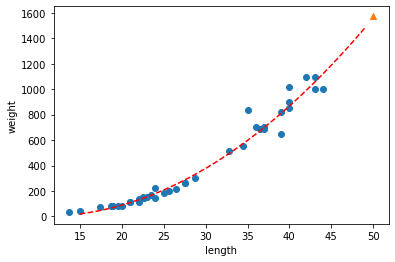

In [89]:
#	구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듬
point = np.arange(15, 50)
#	훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

#	15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05,
        color='red', linestyle='--')

#	50cm	농어 데이터(무게:1574g)
plt.scatter([50], [1574], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [90]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


# 03-3 특성 공학과 규제

# 다중 회귀 (Multiple Regression)
    § 다중 회귀
        • 여러 특성을 사용한 선형 회귀
            – 길이, 높이, 두께 사용
            – 다양한 특성의 조합을 생성
        • PolynomialFeatures 클래스 사용
    § 특성 공학 (Feature	engineering)
        • 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업

In [92]:
import	pandas	as	pd
df =	pd.read_csv('https://bit.ly/perch_csv')
perch_full =	df.to_numpy()	#	DataFrame을 Numpy의 array로 변환
print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


    § target 데이터(perch_weight)는 기존과 동일
    § perch_full,perch_weight를 훈련 세트와 테스트 세트로 분리

In [93]:
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

# 사이킷런의 변환기 (Transformer)
    § 다항 특성 만들기
        • PolynomialFeatures 클래스 사용
            – 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가
        • PloynomialFeatures(include_bias=True)
            – include_bias=True:	bias(절편,	0차항) 추가
            – include_bias=False:	bias	삭제
        • fit([a,	b]): 특성 조합을 찾음
            – [1,	a,	b,	a*b,	a^2,	b^2]	추가
        • transform([[a,	b]]): 특성 조합을 실제 데이터로 변환
            – [1,	a,	b,	a*b,	a^2,	b^2]	로 변환

# 다항 특성 만들기
    § 훈련 세트(train_input)을 사용하여 다항 특성 만들기

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly =	poly.transform(train_input)	#	train_input 데이터를 이용하여
# 총 9개의 특성이 만들어짐
print(train_poly[0:3])
print(train_poly.shape)
# 훈련 세트를 기준으로 만들어진 특성을 이용하여 테스트 세트를 변환하기 위함
test_poly =	poly.transform(test_input)	#	테스트 세트 변환:	fit()호출 안함

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)


## § get_feature_names()
    • 각 특성의 조합을 알려줌

In [97]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 다중 회귀 모델 훈련 #1
    § 다중 회귀 모델 훈련
        • 선형 회귀 모델 훈련과 동일 (여러 개의 특성을 사용할 뿐임)
            – 특성이 늘어나면 선형 회귀의 정확도 증가

In [98]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [99]:
print(lr.score(test_poly, test_target))

0.9714559911594155


# 다중 회귀 모델 훈련 #2
    § degree 증가
        • 고차항의 최대 차수 지정
        • 3제곱, 4제곱, 5제곱 항 추가

In [100]:
#	고차항의 최대 차수 증가 (5차)
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [101]:
#	선형 회귀 모델 훈련 및 훈련 세트 점수 계산
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 테스트 세트 점수 계산
print(lr.score(test_poly, test_target))

0.9999999999938143
-144.40744532797535


# 규제 (Regularization) 오버피팅 방지
    § 규제
        • 모델이 훈련 세트에 과대 적합되는 것을 방지
        • 선형 회귀 모델: 특성에 곱해지는 계수의 크기를 작게 줄임
        • L1 규제 (L1	Regularization)
            – 계수(가중치)의 합을 더한 값에 규제 강도(ƛ)를 곱하여 오차에 더함
            – 어떤 가중치는 0이 됨
        • L2 규제 (L2	Regularization)
            – 각 계수(가중치) 제곱의 합에 규제 강도(ƛ)를 곱합
            – ƛ를 크게 하면 가중치가 더 감소(규제 강화), ƛ를 작게 하면 가중증가
    § 규제 전에 표준화 과정이 필요
        • 각 특성의 크기(스케일)가 다르기 때문에 표준화 과정이 필요
        • StandardScaler 클래스 사용

# 표준화
    § StandardScaler 클래스를 사용한 표준화
        • 평균과 표준 편차 사용
        • fit(), transform() 사용

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# § 규제 모델
    • 릿지(Ridge) 모델: L2	regularization
        – 계수를 제곱한 값을 기준으로 규제
    • 라쏘(Lasso) 모델: L1	regularization
        – 계수(가중치)의 절대값을 기준으로 규제

# 릿지 회귀
    • sklearn.linear_model 패키지
    • fit()로 훈련, score()메소드로 평가
    • Ridge(alpha=1.0)
        – alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)

In [103]:
from	sklearn.linear_model import	Ridge
ridge	=	Ridge()	#	alpha=1.0
ridge.fit(train_scaled,	train_target)
print(ridge.score(train_scaled,	train_target))	#훈련 세트 점수 확인

0.9896101671037343


In [104]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


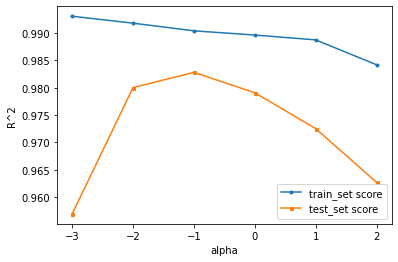

In [105]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score,
        label='train_set score',marker='o',markersize=3)
plt.plot(np.log10(alpha_list),test_score,
        label='test_set score',marker='s',markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()